1. 求解非线性方程组，cos(a) = 1 - d^2 / (2*r^2) ，L = a * r，d = 140，L = 156; 导入参数雅克比矩阵, 再次进行求解。

In [1]:
from scipy.optimize import fsolve
from math import cos, sin

def f(x):
    # two constants
    d = 140
    L = 156
    # variables
    a, r = x.tolist()
    # construct formula
    return [
        a*r-L,
        cos(a)-1+(d*d/(2*r*r))
    ]

non_linear_result = fsolve(f, [1, 1])
print(f"the result of non-linear equation set is {non_linear_result}")

# jacobian
def j(x):
    d = 140
    a, r = x.tolist()
    # partial derivative
    return [
        [r, a],
        [-sin(a), -d*d/r]
    ]

print(f"the result of using jacobian is {fsolve(f, [1, 1], fprime=j)}")

the result of non-linear equation set is [ 1.5940638  97.86308398]
the result of using jacobian is [ 1.59406381 97.86308397]


2. 用curve_fit()函数对高斯分布进行拟合，xϵ[0,10],高斯分布函数为y=a*np.exp(-(x-b)**2/(2*c**2)) , 其中真实值a=1,b=5,c=2。
试对y加入噪声之后进行拟合, 并作图与真实数据进行比较。(参见课件leastsq(),curve_fit()拟合)

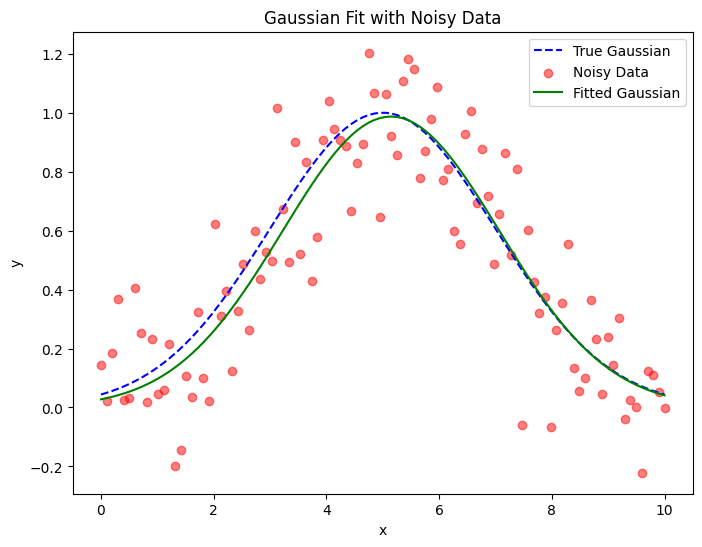

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# define true gaussian function
def true_gaussian(x, a, b, c):
    return a * np.exp(-(x - b)**2 / (2 * c**2))

# create data and data with noise
np.random.seed(42)  # for repeatability
x_true = np.linspace(0, 10, 100)
y_true = true_gaussian(x_true, 1, 5, 2)
y_noisy = y_true + 0.2 * np.random.normal(size=len(x_true))

# define fit function
def fit_gaussian(x, a, b, c):
    return a * np.exp(-(x - b)**2 / (2 * c**2))

# using curve_fit to fit
params, covariance = curve_fit(fit_gaussian, x_true, y_noisy, p0=[1, 5, 2])

# extract fitting result
a_fit, b_fit, c_fit = params

# generate fitted data
y_fit = fit_gaussian(x_true, a_fit, b_fit, c_fit)

# plot
plt.figure(figsize=(8, 6))
plt.plot(x_true, y_true, label='True Gaussian', linestyle='--', color='blue')
plt.scatter(x_true, y_noisy, label='Noisy Data', color='red', alpha=0.5)
plt.plot(x_true, y_fit, label='Fitted Gaussian', linestyle='-', color='green')

plt.title('Gaussian Fit with Noisy Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


3. 对4个数据点x = [-1, 0, 2.0, 1.0]，y = [1.0, 0.3, -0.5, 0.8]进行Rbf插值，插值中使用三种插值方法分别是multiquadric、gaussian、和linear（参见课件5，scipy_rbf.py），需要作点图（加密点）为np.linspace(-3, 4, 100)。

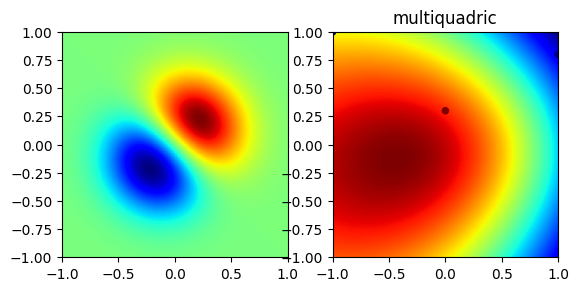

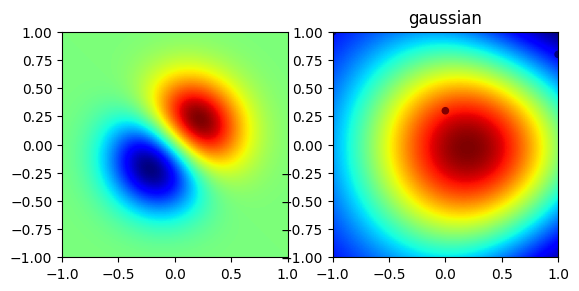

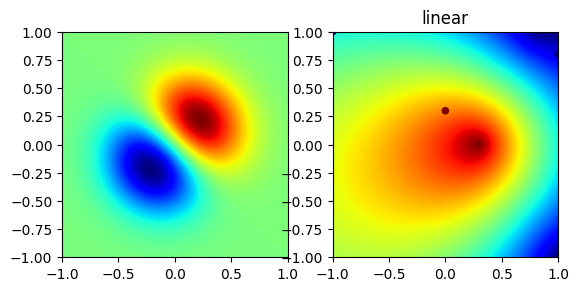

In [17]:
from scipy import interpolate
import numpy as np

x = np.array([-1, 0, 2.0, 1.0])
y = np.array([1.0, 0.3, -0.5, 0.8])

def f(x, y):
    return (x+y)*np.exp(-5.0*(x**2 + y**2))

def plot(x, y, f, f_new, true_vals, title):
    plt.subplot(121)
    plt.imshow(true_vals,extent=[-1,1,-1,1], cmap=plt.cm.jet, origin="lower")
    plt.subplot(122)
    plt.scatter(x,y,20,f(x, y),cmap=plt.cm.jet)
    plt.imshow(f_new,extent=[-1,1,-1,1], cmap=plt.cm.jet, origin="lower")
    plt.title(f'{title}')
    plt.show()

# multiquadric
title = 'multiquadric'
multi_func = interpolate.Rbf(x, y, f(x, y), function='multiquadric')
x_new, y_new = np.mgrid[-1:1:100j, -1:1:100j]
f_new = multi_func(x_new, y_new)
true_vals = f(x_new, y_new)

plot(x, y, f, f_new, true_vals, title)
# gaussian
title = 'gaussian'
gau_func = interpolate.Rbf(x, y, f(x, y), function="gaussian")
x_new, y_new = np.mgrid[-1:1:100j, -1:1:100j]
f_new = gau_func(x_new, y_new)
true_vals = f(x_new, y_new)

plot(x, y ,f ,f_new, true_vals, title)
# linear
title = 'linear'
linear_func = interpolate.Rbf(x, y, f(x, y), function="linear")
x_new, y_new = np.mgrid[-1:1:100j, -1:1:100j]
f_new = linear_func(x_new, y_new)
true_vals = f(x_new, y_new)

plot(x, y ,f ,f_new, true_vals, title)

4. 分别用optimize.fmin_bfgs、optimize.fminbound、optimize.brute三种优化方法对函数x**2 + 10 * np.sin(x)求最小值，并作函数图验证。xϵ[-10, 10].

Optimization terminated successfully.
         Current function value: -7.945823
         Iterations: 5
         Function evaluations: 12
         Gradient evaluations: 6


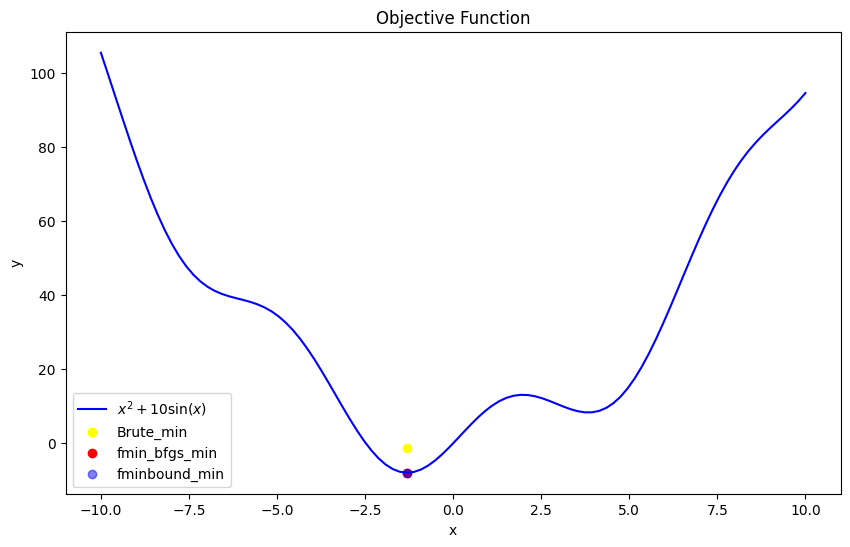

Minimum found by fmin_bfgs: -1.3064401160169776, Minimum value: -7.945823375615215
Minimum found by fminbound: -1.306440096615395, Minimum value: -7.945823375615237
Minimum found by brute: -1.306411132812531, Minimum value: -7.945823370757334


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fmin_bfgs, fminbound, brute

# define objective function
def objective_function(x):
    return x**2 + 10 * np.sin(x)

# define data range
x_values = np.linspace(-10, 10, 100)
y_values = objective_function(x_values)

# plot
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label=r'$x^2 + 10 \sin(x)$', color='blue')
plt.title('Objective Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# using fmin_bfgs to optimize
x_opt_bfgs = fmin_bfgs(objective_function, x0=0)[0]

# usingfminbound to optimize
x_opt_fminbound = fminbound(objective_function, -10, 10)

# using brute to optimize
brute_range = slice(-10, 10, 0.1)
result = brute(objective_function, (brute_range,))[0]

# plot minimum values
plt.scatter(result, result, color='yellow', label='Brute_min')
plt.scatter(x_opt_bfgs, objective_function(x_opt_bfgs), color='red', label='fmin_bfgs_min')
plt.scatter(x_opt_fminbound, objective_function(x_opt_fminbound), color='blue', label='fminbound_min', alpha=0.5)

plt.legend()
plt.show()

print(f"Minimum found by fmin_bfgs: {x_opt_bfgs}, Minimum value: {objective_function(x_opt_bfgs)}")
print(f"Minimum found by fminbound: {x_opt_fminbound}, Minimum value: {objective_function(x_opt_fminbound)}")
print(f"Minimum found by brute: {result}, Minimum value: {objective_function(result)}")


5. 

In [11]:
from scipy import integrate
import numpy as np

# first integration
def f_1st(x):
    return np.cos(np.exp(1)*x)**2
result_1st, err_1 = integrate.quad(f_1st, 0, 3)
print(f"the result of the first integration is {result_1st}")

# second integration
def f_2nd(x, y):
    return 16*x*y

def x_upper_limit(y):
    return np.sqrt(1-4*y**2)

y_lower_limit = 0
y_upper_limit = 0.5

result_2nd, err_2 = integrate.dblquad(f_2nd, y_lower_limit, y_upper_limit, 0, x_upper_limit)
print(f"the result of the second integration is {result_2nd}")

the result of the first integration is 1.447938845164999
the result of the second integration is 0.5


6. 弹簧系统每隔1ms周期的系统状态  ,试用odeint()对该系统进行求解并作图，其中参数M, k, b, F = 1.0, 0.5, 0.2, 1.0；初值init_status = -1, 0.0；t = np.arange(0, 50, 0.02)。

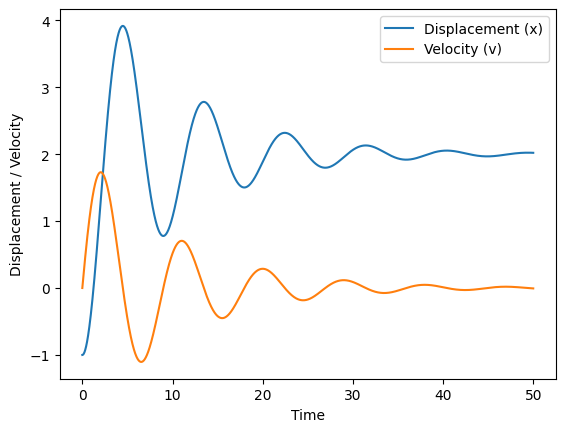

In [12]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# define spring system
def spring_system(y, t, M, k, b, F):
    x, v = y
    dxdt = v
    dvdt = (F - b * v - k * x) / M
    return [dxdt, dvdt]

M, k, b, F = 1.0, 0.5, 0.2, 1.0
init_status = [-1.0, 0.0]
t = np.arange(0, 50, 0.02)

# integration
solution = odeint(spring_system, init_status, t, args=(M, k, b, F))

# result
x, v = solution.T

# plot
plt.plot(t, x, label='Displacement (x)')
plt.plot(t, v, label='Velocity (v)')
plt.xlabel('Time')
plt.ylabel('Displacement / Velocity')
plt.legend()
plt.show()


7. 从参数为1的伽马分布生成1000个随机数,然后绘制这些样点的直方图；并绘制此伽马分布函数概率密度（pdf图）进行比较。(参见课件)

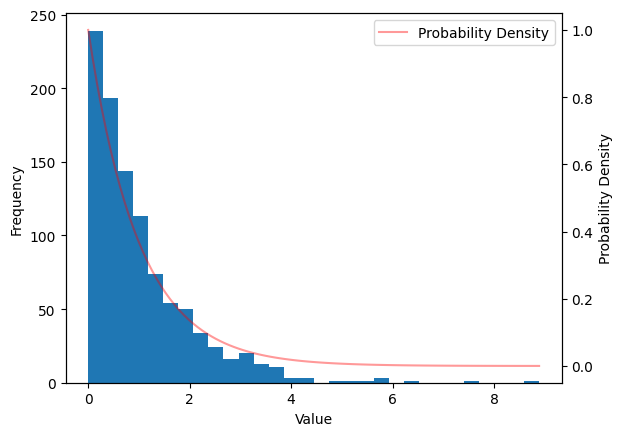

In [62]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

generate_data = stats.gamma.rvs(1, size=1000)

fig, ax_1 = plt.subplots()
ax_1.set_xlabel('Value')
ax_1.set_ylabel('Frequency')
ax_1.hist(generate_data, bins=30)

x = np.linspace(0, max(generate_data), 100)
pdf_data = stats.gamma.pdf(x, 1)

# share x axis
ax_2 = ax_1.twinx()
ax_2.set_ylabel('Probability Density')
ax_2.plot(x, pdf_data, color='red', alpha=0.4, label='Probability Density')

plt.legend()
plt.show()

8. scipy.sparse中提供了多种表示稀疏矩阵的格式，试用dok_martix，lil_matrix表示表示的矩阵[[3 0 8 0] [0 2 0 0] [0 0 0 0] [0 0 0 1]]，并与sparse.coo_matrix表示法进行比较。

In [7]:
from scipy import sparse
import numpy as np

data = np.array([[3, 0, 8, 0],
                 [0, 2, 0, 0],
                 [0, 0, 0, 0],
                 [0, 0, 0, 1]])

# coo_matrix for reading and writing
coo_mat = sparse.coo_matrix(data)
# dok_matrix 
dok_mat = sparse.dok_matrix(data)
# lil_matrix
lil_mat = sparse.lil_matrix(data)

print("Dok Matrix:")
print(dok_mat.toarray())
print(dok_mat[[1,2]])
print("\nLil Matrix:")
print(lil_mat.toarray())
print(lil_mat[[1,2]])
print("\nCoo Matrix:")
print(coo_mat.toarray())
print(coo_mat[[1,2]])

Dok Matrix:
[[3 0 8 0]
 [0 2 0 0]
 [0 0 0 0]
 [0 0 0 1]]
  (0, 1)	2

Lil Matrix:
[[3 0 8 0]
 [0 2 0 0]
 [0 0 0 0]
 [0 0 0 1]]
  (0, 1)	2

Coo Matrix:
[[3 0 8 0]
 [0 2 0 0]
 [0 0 0 0]
 [0 0 0 1]]


TypeError: 'coo_matrix' object is not subscriptable